In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('liver_disease_.csv')

data.shape

data.describe()
data.dtypes


Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                        object
dtype: object

AttributeError: 'DataFrame' object has no attribute 'cat'

In [6]:
for j in data.columns :
    if (data[j].dtypes == 'int64' or data[j].dtypes == 'float64' ) :
        mean = data[j].mean()
        data[j] = data[j].replace(np.NAN,mean)
data["Gender"] = data["Gender"].astype('category').cat.codes
data["Dataset"] = np.where(data['Dataset'].str.contains('Yes'), 1, 0)
       
        

In [8]:
#Let's create numpy arrays for features and target
X = data.drop('Dataset',axis=1).values
y = data['Dataset'].values

In [9]:
#Split the dataset into train and test with stratification
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [10]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


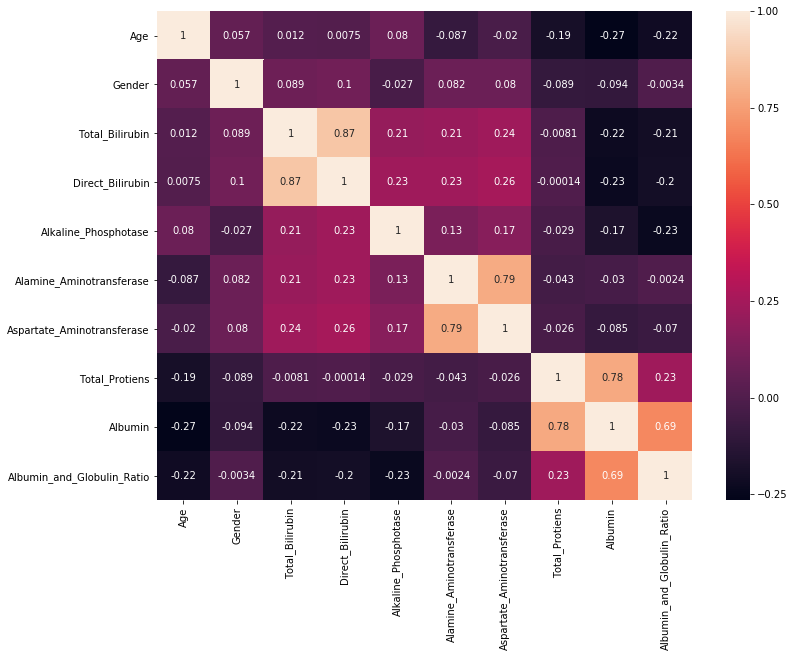

In [14]:
plt.figure(figsize=(12,9))
attrdf =data.drop('Dataset',axis=1)
sns.heatmap(attrdf.corr(),annot=True)

In [15]:
classifier= GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
print ("Confusion matrix ", confusion_matrix(y_test,y_pred))

Confusion matrix  [[49  1]
 [70 55]]


In [18]:
print("f1_score", f1_score(y_test,y_pred))
print("accuracy_score", accuracy_score(y_test,y_pred))

f1_score 0.6077348066298341
accuracy_score 0.5942857142857143
